In [245]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [246]:
vinos = pd.read_csv("C:/Users/Fanper/Documents/PYTHON/Proyectos_IA/vino.csv")
vinos.head()

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline,Wine Type
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,One
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,One
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,One
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,One
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,One


In [247]:
x = vinos.drop("Wine Type", axis=1)
y = vinos["Wine Type"]

In [248]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=45)

In [249]:
random =  RandomForestClassifier(n_estimators=80 )
random.fit(x_train, y_train)

RandomForestClassifier(n_estimators=80)

In [250]:
predicciones = random.predict(x_test)

In [251]:
print(classification_report(y_test,predicciones))

              precision    recall  f1-score   support

         One       1.00      0.94      0.97        16
       Three       0.95      1.00      0.98        20
         Two       0.94      0.94      0.94        18

    accuracy                           0.96        54
   macro avg       0.97      0.96      0.96        54
weighted avg       0.96      0.96      0.96        54



In [252]:
print(confusion_matrix(y_test,predicciones))

[[15  0  1]
 [ 0 20  0]
 [ 0  1 17]]


In [253]:
flores =sns.load_dataset("iris")
flores

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [254]:
flores["species"].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [255]:
flores["species"].value_counts()

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

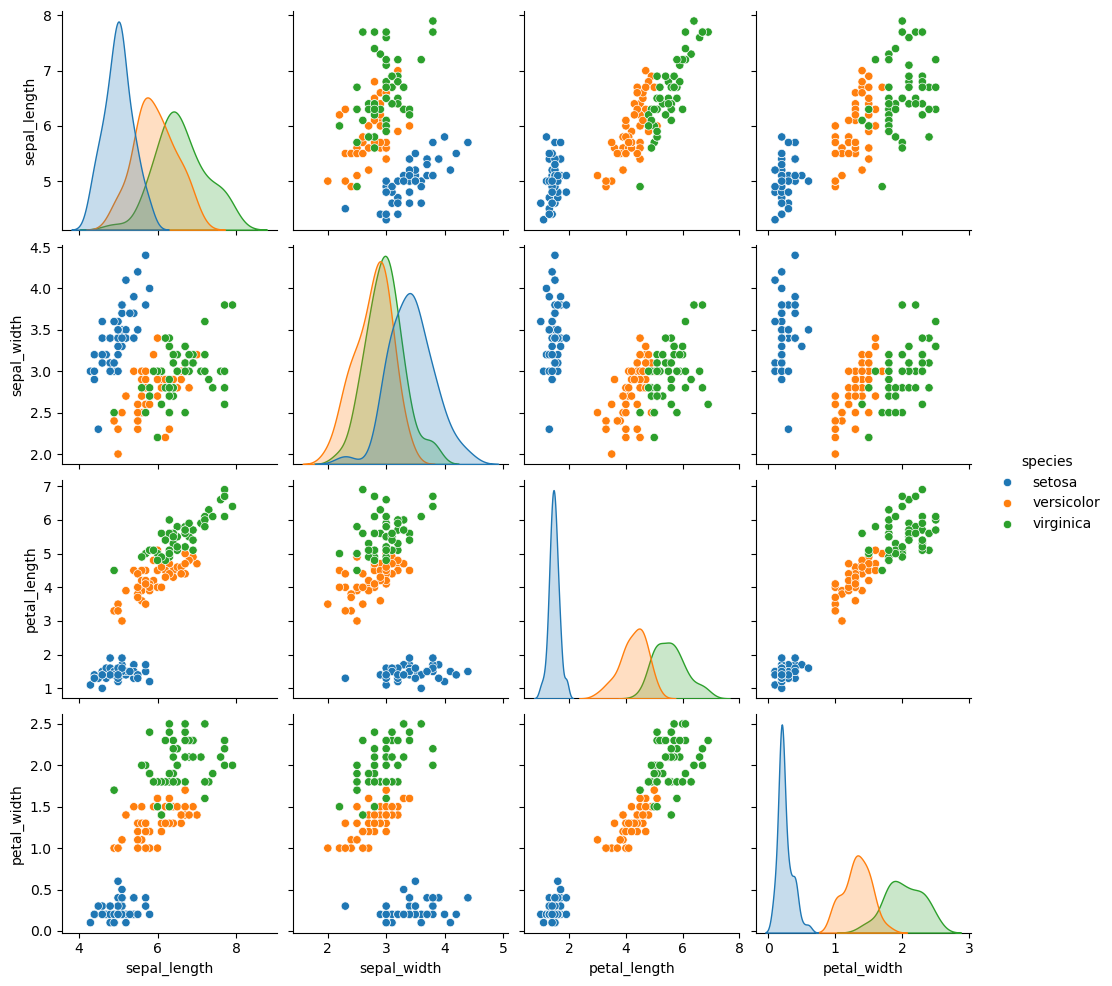

In [256]:
sns.pairplot(flores, hue="species")

In [257]:
X = flores.drop("species", axis=1)
Y = flores["species"]

In [258]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)

In [259]:
modelo = SVC(gamma="auto")
modelo.fit(X_train, Y_train)

SVC(gamma='auto')

In [260]:
predic = modelo.predict(X_test)

In [261]:
print(classification_report(Y_test, predic))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        16
  versicolor       1.00      1.00      1.00        17
   virginica       1.00      1.00      1.00        12

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



In [262]:
print(confusion_matrix(Y_test, predic))

[[16  0  0]
 [ 0 17  0]
 [ 0  0 12]]


## Algoritmo de las k.medias

In [263]:
datos = make_blobs(n_samples=200, n_features=2, centers=4)
datos

(array([[  8.69970678,  10.10107839],
        [ -5.93906129,  -9.50563356],
        [  2.45626671,   1.63318237],
        [  1.67785874,   4.3098635 ],
        [  7.27893348,  10.518295  ],
        [  1.79903889,   4.13631294],
        [ -2.66571791,   2.350298  ],
        [  3.25764193,   5.5219034 ],
        [ -5.46406969,   4.65993664],
        [ -5.71269463,  -9.19581856],
        [ -3.38004473,   2.45147393],
        [ -5.59464432, -11.35790826],
        [ -6.09632353,  -8.64272938],
        [ -2.82609093,   2.64605715],
        [  7.35757326,   8.89791596],
        [  7.45167308,   9.58212679],
        [  1.64380897,   4.88164216],
        [ -5.00893401,   2.52585012],
        [ -6.40682206, -12.72536156],
        [ -2.59083729,   4.20662187],
        [ -4.79912507, -10.21197632],
        [ -5.96274964, -10.56261148],
        [  3.84043548,   4.31917691],
        [ -1.25377817,   4.90092725],
        [  3.49566233,   5.10265601],
        [ -2.88205326,   1.17484008],
        [  7

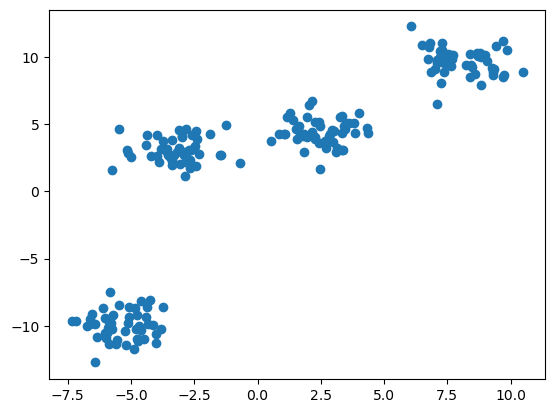

In [264]:
plt.scatter(datos[0][:,0], datos[0][:,1])

In [265]:
molde = KMeans(n_clusters=4)
molde.fit(datos[0])

C:\Users\Fanper\AppData\Roaming\Python\Python312\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=4)

In [266]:
molde.cluster_centers_

array([[ 2.51881291,  4.42168656],
       [-5.36425165, -9.96020898],
       [ 8.06423308,  9.67465971],
       [-3.20195317,  3.07056238]])

In [267]:
molde.labels_

array([2, 1, 0, 0, 2, 0, 3, 0, 3, 1, 3, 1, 1, 3, 2, 2, 0, 3, 1, 3, 1, 1,
       0, 3, 0, 3, 2, 1, 1, 1, 2, 3, 0, 2, 1, 1, 1, 2, 1, 3, 3, 3, 2, 3,
       2, 1, 2, 3, 0, 1, 2, 2, 3, 3, 1, 0, 0, 3, 1, 3, 1, 0, 2, 0, 2, 2,
       1, 3, 3, 3, 1, 3, 2, 3, 1, 0, 1, 0, 1, 1, 0, 0, 1, 3, 3, 2, 3, 2,
       3, 0, 2, 0, 0, 1, 1, 3, 2, 1, 2, 3, 0, 1, 3, 2, 1, 0, 0, 3, 3, 1,
       2, 0, 0, 0, 3, 3, 2, 2, 2, 2, 3, 0, 3, 3, 1, 3, 2, 3, 2, 3, 1, 2,
       1, 0, 1, 3, 3, 1, 0, 2, 0, 0, 3, 3, 1, 2, 0, 3, 3, 2, 1, 2, 0, 3,
       2, 1, 1, 2, 0, 0, 3, 1, 0, 0, 0, 1, 1, 1, 0, 2, 0, 0, 2, 0, 2, 2,
       0, 0, 1, 0, 2, 3, 2, 1, 2, 3, 1, 2, 2, 0, 0, 0, 2, 1, 2, 0, 0, 2,
       1, 2])

Text(0.5, 1.0, 'Datos originales')

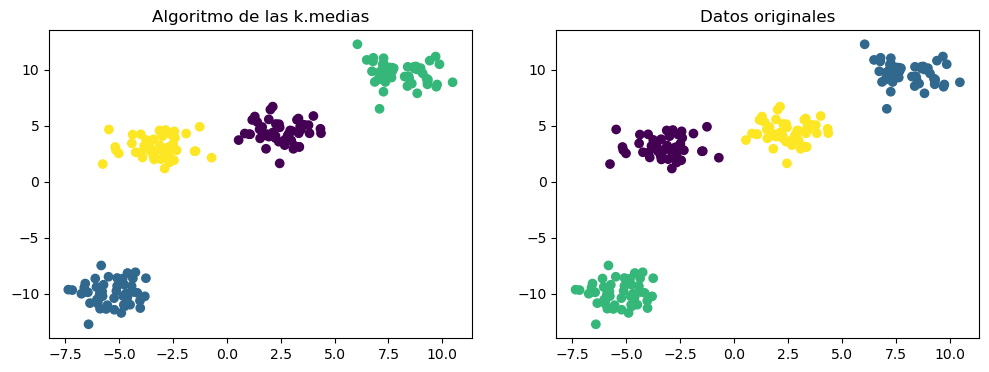

In [268]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(12, 4))
ax1.scatter(datos[0][:,0], datos[0][:,1], c=molde.labels_)
ax1.set_title("Algoritmo de las k.medias")
ax2.scatter(datos[0][:,0], datos[0][:,1], c=datos[1])
ax2.set_title("Datos originales")

## exportar modelo a un archivo.

In [269]:
import pickle

with open("C:/Proyectos/molde.pickle", "wb") as file:
    pickle.dump(modelo, file)

## inportar modelo desde un archivo.

In [270]:
import pickle

with open("C:/Proyectos/molde.pickle", "rb") as file:
    modelo_entrenado = pickle.load(file)

In [271]:
predic = modelo_entrenado.predict(X_test)
print(classification_report(Y_test, predic))
print(confusion_matrix(Y_test, predic))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        16
  versicolor       1.00      1.00      1.00        17
   virginica       1.00      1.00      1.00        12

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

[[16  0  0]
 [ 0 17  0]
 [ 0  0 12]]
